In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result = pd.read_pickle(f_main_result)

In [5]:
f_main_result_perf = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_perf = pd.read_pickle(f_main_result_perf)

In [6]:
df_main_result = df_main_result.join(df_main_result_perf[['cc2_normed_avg']], how='inner')

In [7]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         16          1           legacy       2560            29837   
                                                                                                  5120            29837   
                                                             32          1           legacy       1280            67149   
                                                                                                  2560            67149   
                                                                                                  5120            67149   

                                                                                                                                                source_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu     False                mse       0          2         8           1           cm-avg       1280                        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}   
                                                                                                  5120                         {('I', 'B1'): 2.870888935845869}   
                                                                                     cm-last      1280                        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}   
...                                                                                                                                                         ...   
softplus True                 poisson   1          6         16          1           legacy       2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.107387...   
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.306178...   
                                                             32          1           legacy       1280        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.037384...   
                                                                                                  2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.227771...   
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.672935...   

                                                                                                              cc2_normed_avg  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                  
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125  
         

In [8]:
# remove those with layer >= 8
df_main_result = df_main_result.loc[df_main_result.index.get_level_values('rcnn_bl_cls') <= 7]
df_main_result = df_main_result.sort_index()
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         16          1           legacy       2560            29837   
                                                                                                  5120            29837   
                                                             32          1           legacy       1280            67149   
                                                                                                  2560            67149   
                                                                                                  5120            67149   

                                                                                                                                                source_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu     False                mse       0          2         8           1           cm-avg       1280                        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}   
                                                                                                  5120                         {('I', 'B1'): 2.870888935845869}   
                                                                                     cm-last      1280                        {('I', 'B1'): 0.7241598808209915}   
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}   
...                                                                                                                                                         ...   
softplus True                 poisson   1          6         16          1           legacy       2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.107387...   
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.306178...   
                                                             32          1           legacy       1280        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.037384...   
                                                                                                  2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.227771...   
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.672935...   

                                                                                                              cc2_normed_avg  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                  
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125  
         

In [9]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        ret[len(key)-2] += v
    ret = ret/ret.sum()
    return ret

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))

In [10]:
# show mean vs sem, for different cls

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def plot_vec_bars(ax, df_this):
    data = np.asarray([x for x in df_this['source_analysis_vec'].values])
    num_case, num_col = data.shape
    assert num_case == 50
    assert num_col == 8
    
    perf = df_this['cc2_normed_avg']
    print(perf.mean(), perf.std())
    
    plt_vec_bars_inner(ax, data)

In [13]:
def plt_vec_bars_inner(ax, data, perf=None):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    
    
    ax.bar(x=np.arange(1,9), height=data_mean, yerr=data_std)
    ax.set_xlabel('# of convs inside recurrent blocks')
    ax.set_ylabel('normalized weight')
    if perf is not None:
        assert perf.shape == (data.shape[0],)
        ax.set_title('num case {}, perf {:.4f}+/-{:.4f}'.format(
        data.shape[0], perf.mean(), perf.std()))
    ax.set_ylim(0, 1.0)

In [14]:
from sklearn.cluster import KMeans

In [15]:
def get_clustering(df_this):
    num_cluster = 4
    print(df_this.shape)
    assert df_this.shape[0] == 672 // 6
    perf_vec = df_this['cc2_normed_avg'].values
#     print(df_this['source_analysis_vec'])
    src_analysis_vec = np.asarray([x.tolist() for x in df_this['source_analysis_vec'].values])
#     print(src_analysis_vec.shape)
    assert src_analysis_vec.shape == (672 // 6, 8)
    
    # do clustering.
    # for each cluster, show cluster size, vec_bars, and spread of performance.
    y = KMeans(n_clusters=num_cluster, random_state=0).fit_predict(src_analysis_vec)
    

    ret = {
        'y': y,
        'perf_vec': perf_vec,
        'src_analysis_vec': src_analysis_vec,
        'num_cluster': num_cluster,
    }
    
#     plot_clustering(**ret)
    return ret

In [29]:
def plot_clustering(*, y, perf_vec, src_analysis_vec, num_cluster, title=None):
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=num_cluster, figsize=(20, 3))
    if title is not None:
        fig.suptitle(title)
    axes = axes.ravel()
    
    perf_mean_vec = []
    for idx in range(num_cluster):
        perf_mean_vec.append(perf_vec[y==idx].mean())
    idx_good = np.argsort(perf_mean_vec)[::-1]
    
    for idx, ax in zip(idx_good, axes):
        y_this = y==idx
        plt_vec_bars_inner(ax, src_analysis_vec[y_this], perf_vec[y_this])
    plt.show()

In [17]:


def show_scatter_plots():
    clustering_result_dict = []
    for train_keep in df_main_result.index.get_level_values('train_keep').unique():
        df_this_main = df_main_result.xs(train_keep, level='train_keep')
        df_this_main_ff = df_this_main.xs(1, level='rcnn_bl_cls')
        for readout_type in df_this_main.index.get_level_values('readout_type').unique():
            if readout_type == 'legacy':
                continue
            
            df_this_readout = df_this_main.xs(readout_type, level='readout_type')
            

            index_out_channel = df_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_this_readout.index.get_level_values('num_layer').values

            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            #     print(data_channel_layer.dtype, data_channel_layer.shape)
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()
            
            for key_this in unique_channel_layer:                
                
#                 plt.close('all')
#                 fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
#                 axes = axes.ravel()
                
#                 print(key_this)
                key_this = tuple(key_this)
                
                (c_this, l_this) = key_this
                global_key = {
                    'train_keep': train_keep,
                    'readout_type': readout_type,
                    'num_channel': c_this,
                    'num_layer': l_this,
                }
                
                
                
                df_this = df_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                
                # remove layer=1 models
                # and add back layer=1 models with similar numbers of parameteres
                # basically, other stuffs being the same, l_this should be (l_this - 1)*2 + 1
                df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls')!=1]
                print(global_key)
                print((c_this, (l_this - 1)*2 + 1))
                df_this_ff = df_this_main_ff.xs(
                    key=(c_this, (l_this - 1)*2 + 1),
                    level=('out_channel', 'num_layer')
                ).copy(deep=True)
#                 print(df_this_ff.shape)
                df_this_ff.index.set_codes(
                    codes=[
                        0,
                    ]*len(df_this_ff),
                    level='readout_type',
                    inplace=True,
                )
                df_this_ff = df_this_ff[~df_this_ff.index.duplicated()]
#                 print(df_this_ff)
#                 print(df_this.shape, df_this_ff.shape)
                
                
#                 print(len(df_this), len(df_this_readout))
#                 assert len(df_this)*6 == len(df_this_readout)
                
#                 # sort
#                 df_this_sorted = df_this.sort_values('cc2_normed_avg', ascending=False)
#                 df_this_sorted_top = df_this_sorted.iloc[:50]
#                 df_this_sorted_bottom = df_this_sorted.iloc[-50:]
#                 # plot top 50 models
                
#                 plot_vec_bars(axes[0], df_this_sorted_top)
#                 axes[0].set_title('top 50 cases')
                
#                 # plot bottom 50 models
#                 plot_vec_bars(axes[1], df_this_sorted_bottom)
#                 axes[1].set_title('bottom 50 cases')


#             axes[0].legend(loc='best')
#             axes[1].legend(loc='best')
#                 fig.suptitle(f'train_keep={train_keep}, num_layer={l_this}, num_channel={c_this}, readout={readout_type}, {len(df_this)} variants')
#             axes[0].set_title('normal stimuli (black)')
#             axes[1].set_title('inverted stimuli (white)')

#             axes[0].set_xlabel('diff mean')
#             axes[1].set_xlabel('diff mean')
#             axes[0].set_ylabel('diff sem')
#                 plt.show()
                
    
                global_key.update(
                    {
                        'clustering': get_clustering(
                            pd.concat([df_this, df_this_ff], axis=0))
                    }
                )
        
                clustering_result_dict.append(global_key) 
    
                
    
    
                # let's do clustering over these types

#             print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
#             print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
    return pd.DataFrame(clustering_result_dict, columns=list(clustering_result_dict[0].keys())).set_index(
        ['train_keep','readout_type','num_channel','num_layer'], verify_integrity=True
    )
clustering_result_dict_global = show_scatter_plots()

{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 8, 'num_layer': 2}
(8, 3)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 8, 'num_layer': 3}
(8, 5)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 16, 'num_layer': 2}
(16, 3)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 16, 'num_layer': 3}
(16, 5)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 32, 'num_layer': 2}
(32, 3)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-avg', 'num_channel': 32, 'num_layer': 3}
(32, 5)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-last', 'num_channel': 8, 'num_layer': 2}
(8, 3)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-last', 'num_channel': 8, 'num_layer': 3}
(8, 5)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-last', 'num_channel': 16, 'num_layer': 2}
(16, 3)
(112, 4)
{'train_keep': 1280, 'readout_type': 'cm-last', 'num_channel': 16, 'num_layer': 3}
(16, 5)
(112, 4)
{'train_keep':

In [18]:
def plot_cluster_wrapper(
    *,
    train_size=None,
    readout_type=None,
    num_c=None,
    num_l=None,
):
    key = (train_size, readout_type, num_c, num_l)
   
    levels = ('train_keep', 'readout_type', 'num_channel', 'num_layer')
    
    # remove None
    keep = [k is not None for k in key]
    key = tuple([k for k in key if k is not None])
    levels = tuple([l for keep_this, l in zip(keep, levels) if keep_this])
    assert len(key) == len(levels)
    
    data_new = clustering_result_dict_global.xs(key=key, level=levels)
    for idx, data in data_new['clustering'].iteritems():
        plot_clustering(**data, title=str(idx))

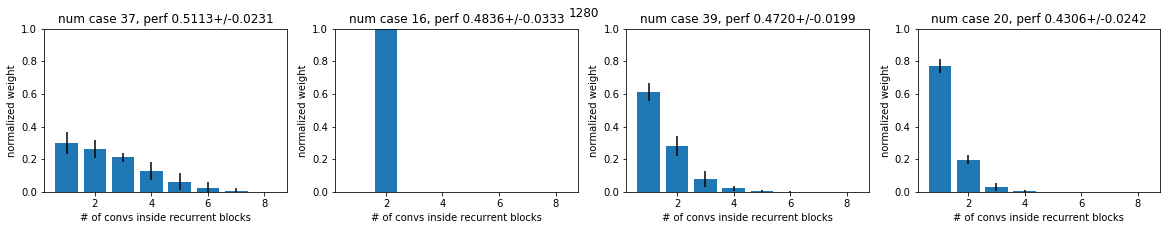

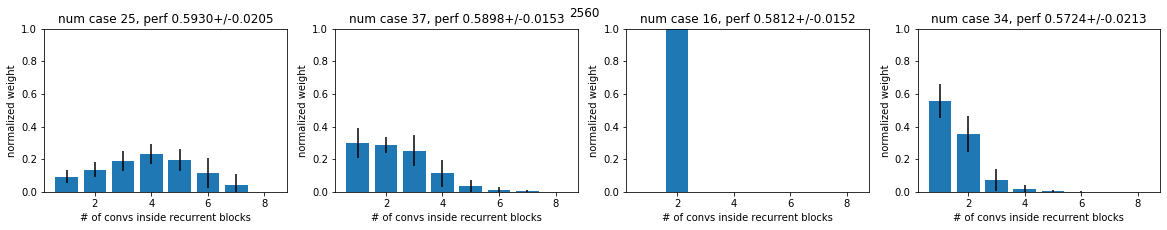

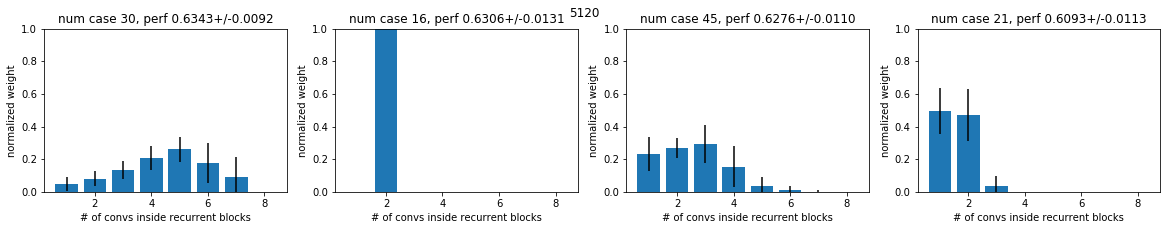

In [30]:
# plot some slices

# increase train size

plot_cluster_wrapper(readout_type='cm-avg',num_c=16,num_l=2)

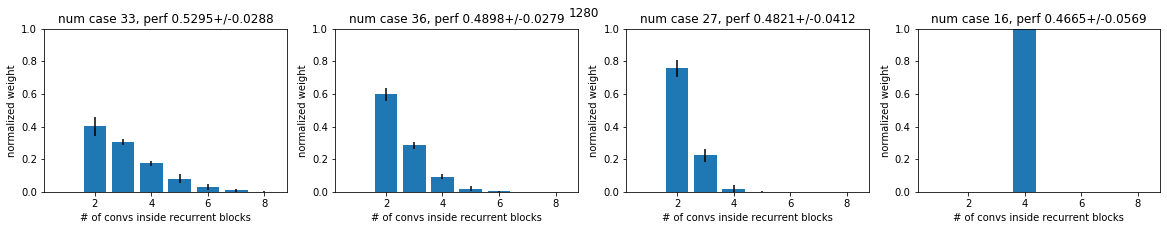

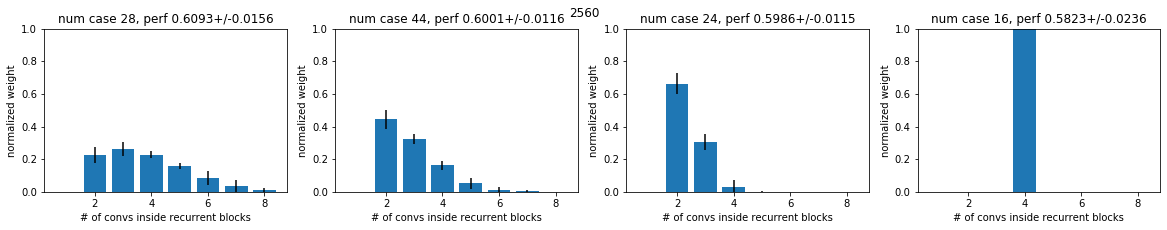

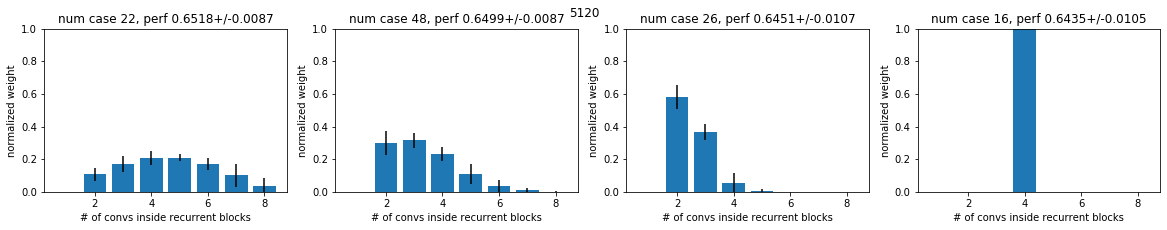

In [31]:
plot_cluster_wrapper(readout_type='cm-avg',num_c=16,num_l=3)

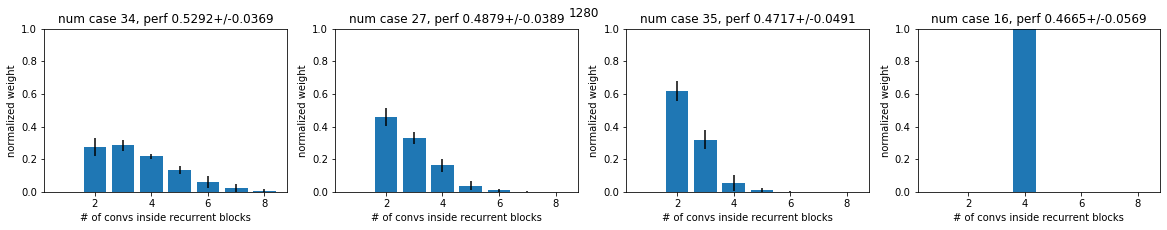

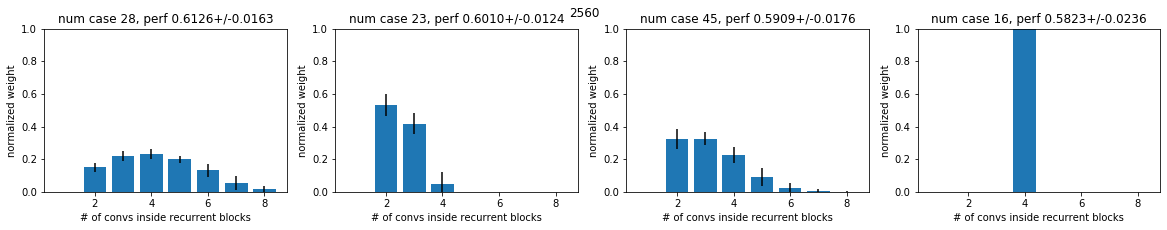

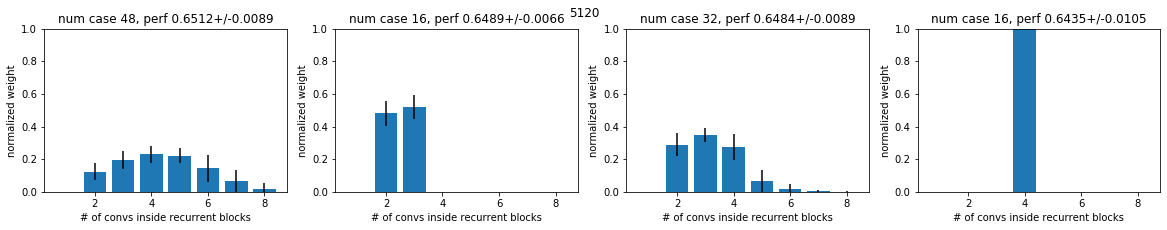

In [32]:
plot_cluster_wrapper(readout_type='cm-last',num_c=16,num_l=3)

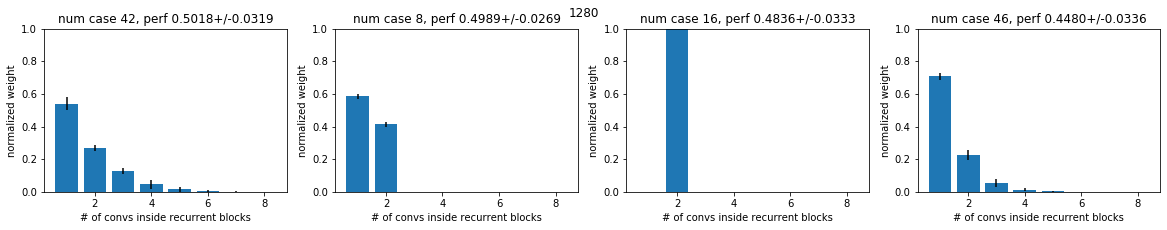

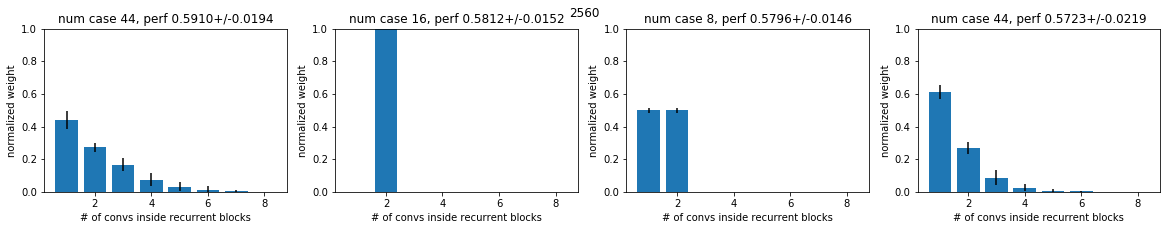

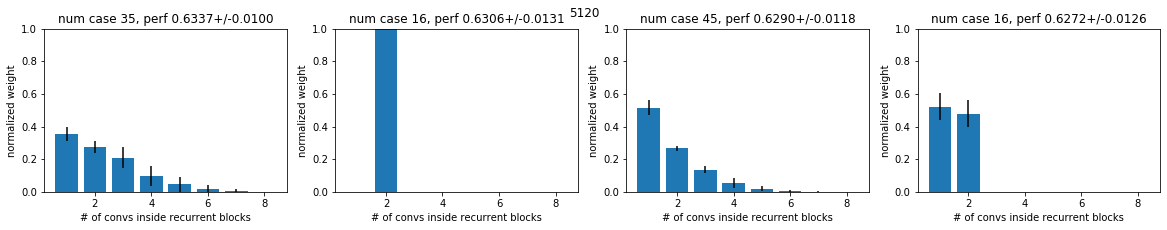

In [33]:
plot_cluster_wrapper(readout_type='inst-last',num_c=16,num_l=2)

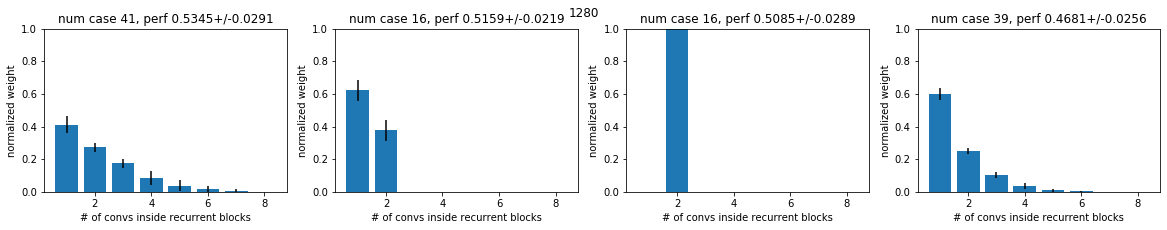

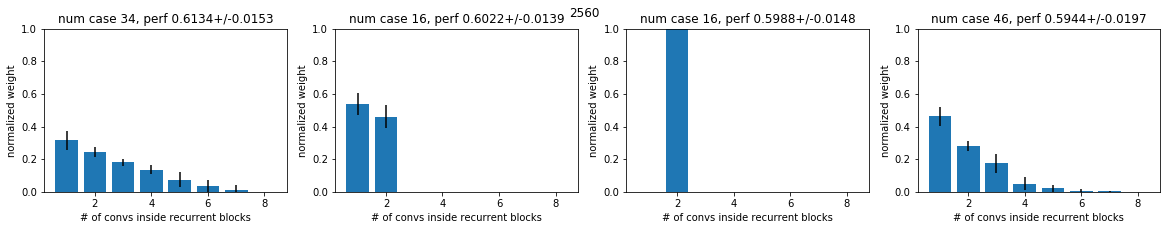

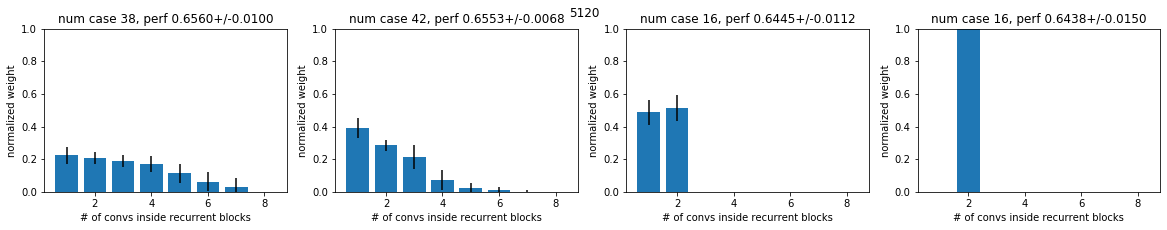

In [34]:
plot_cluster_wrapper(readout_type='inst-last',num_c=32,num_l=2)

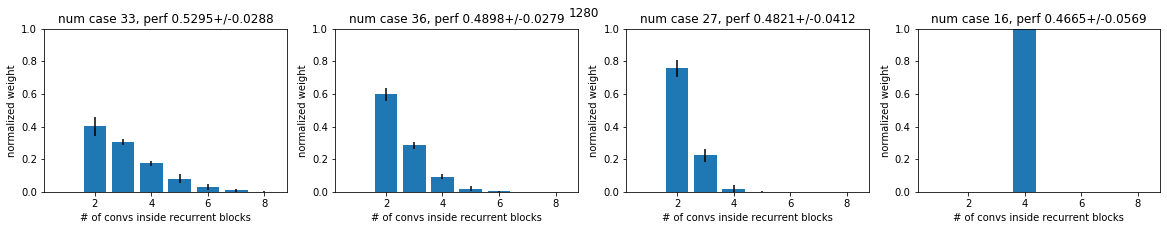

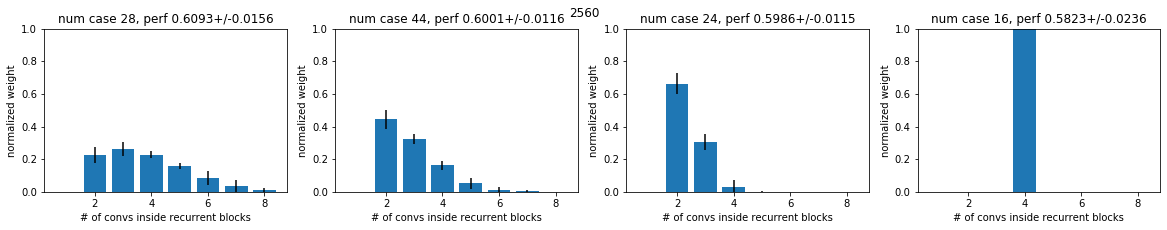

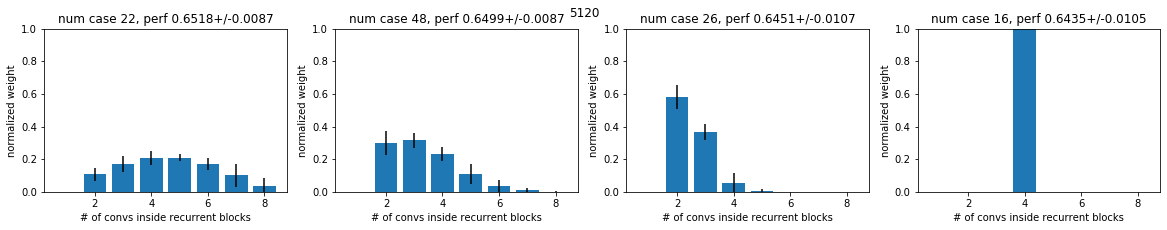

In [35]:
plot_cluster_wrapper(readout_type='cm-avg',num_c=16,num_l=3)

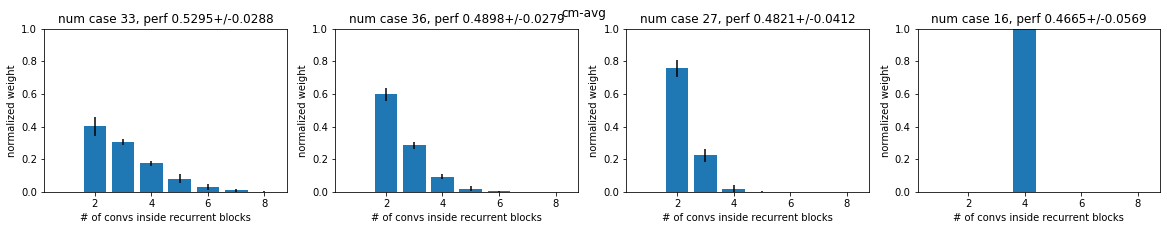

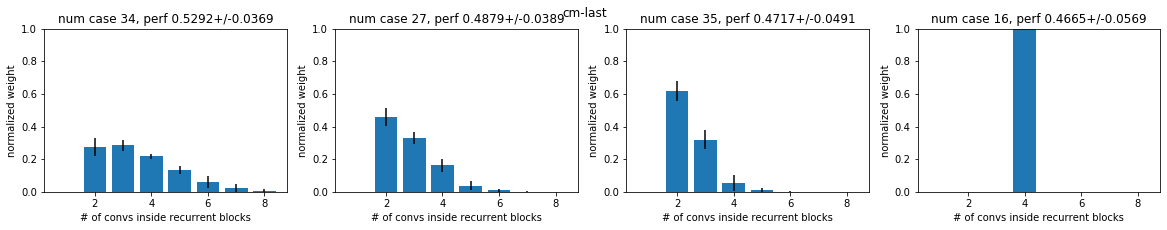

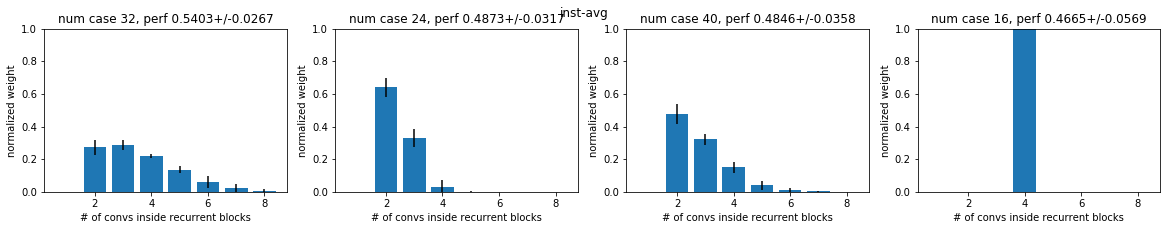

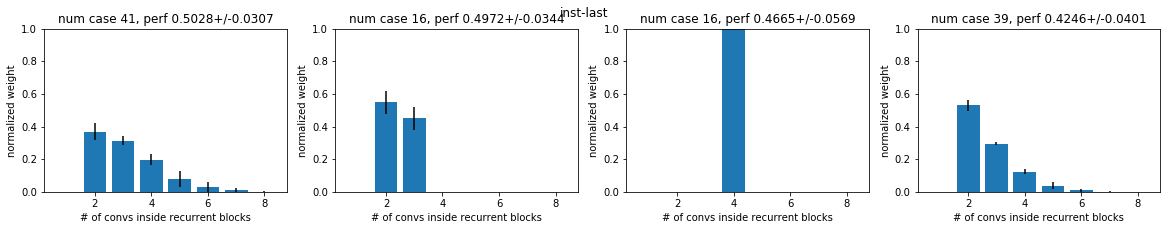

In [37]:
plot_cluster_wrapper(train_size=1280, readout_type=None,num_c=16,num_l=3)

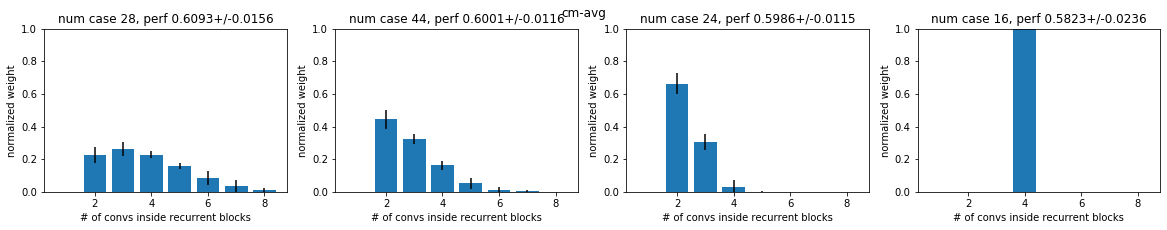

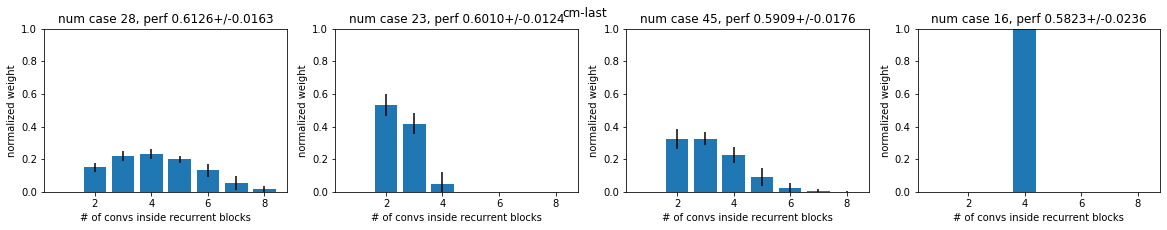

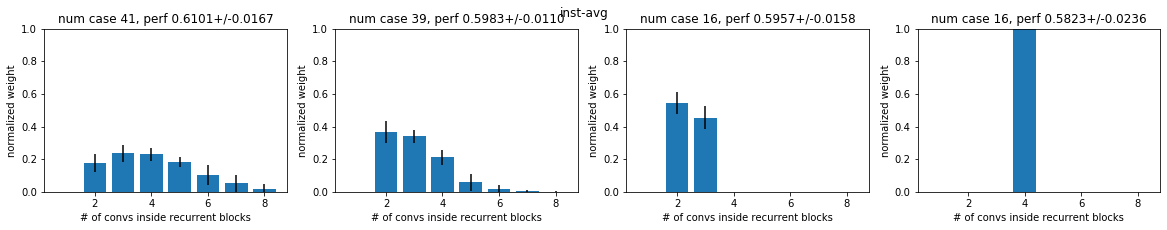

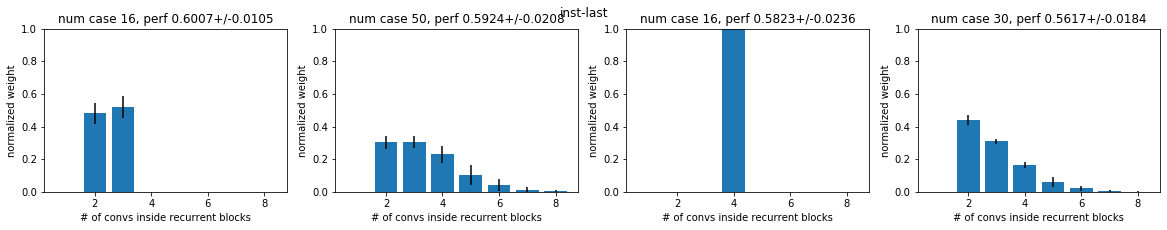

In [38]:
plot_cluster_wrapper(train_size=2560, readout_type=None,num_c=16,num_l=3)

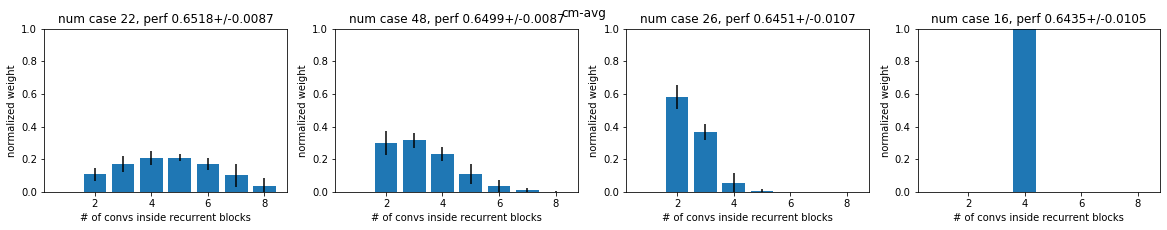

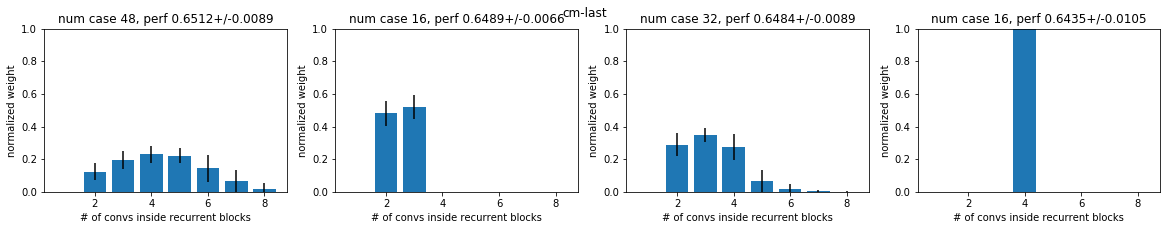

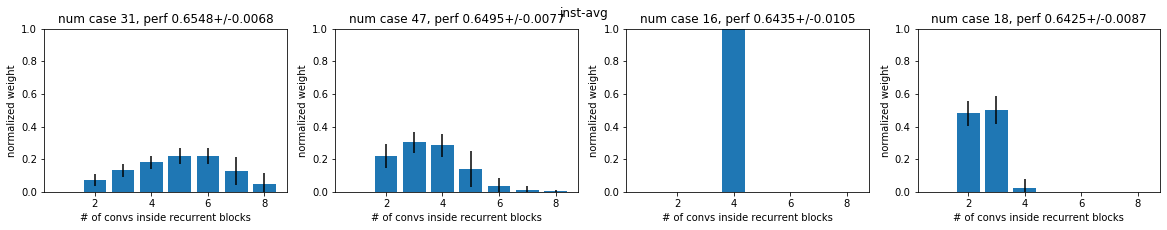

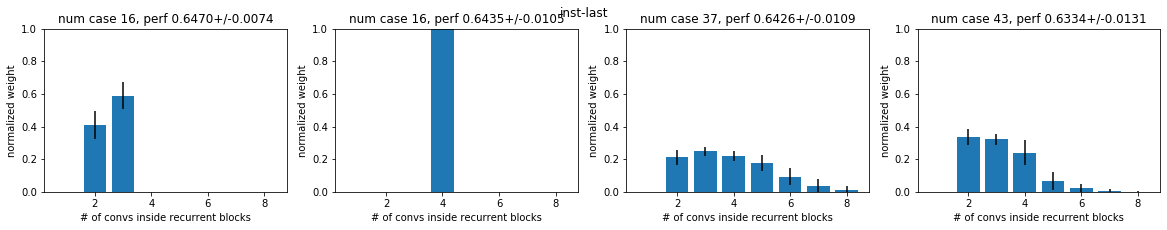

In [39]:
plot_cluster_wrapper(train_size=5120, readout_type=None,num_c=16,num_l=3)

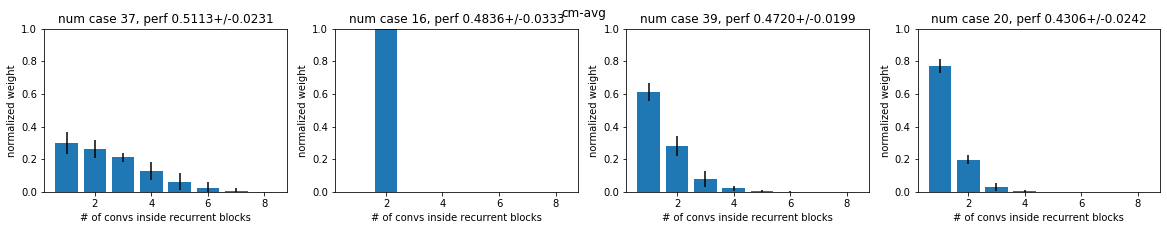

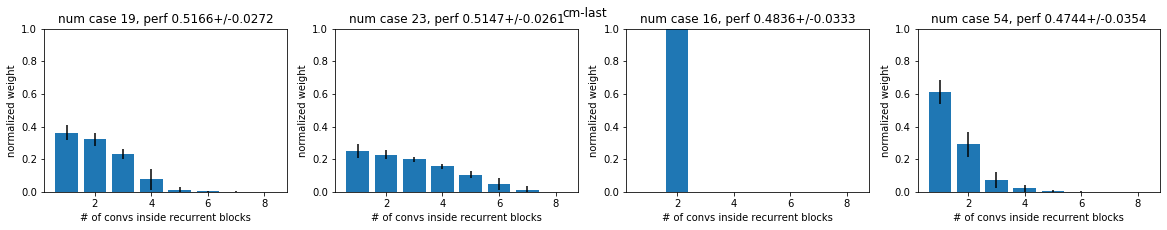

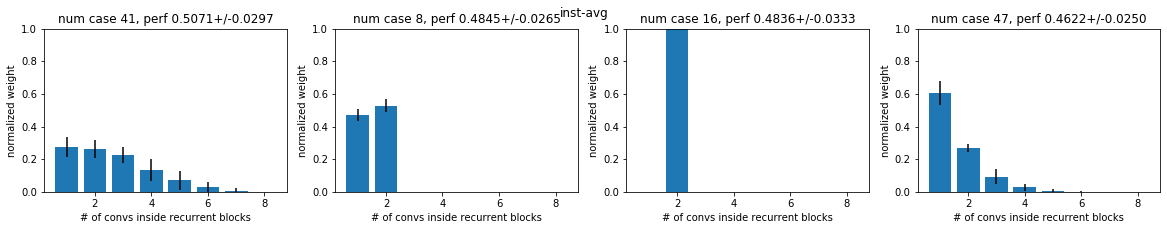

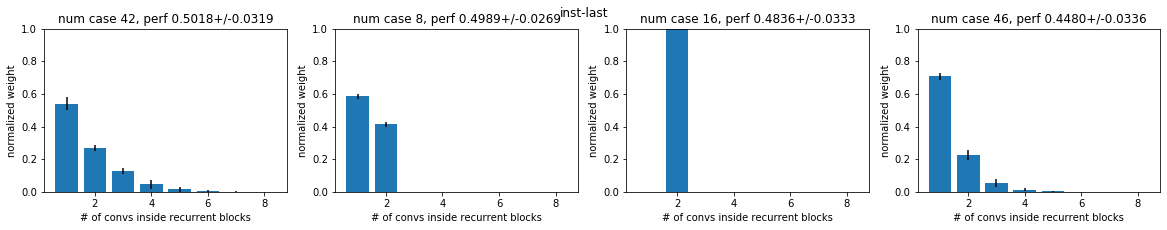

In [40]:
plot_cluster_wrapper(train_size=1280, readout_type=None,num_c=16,num_l=2)

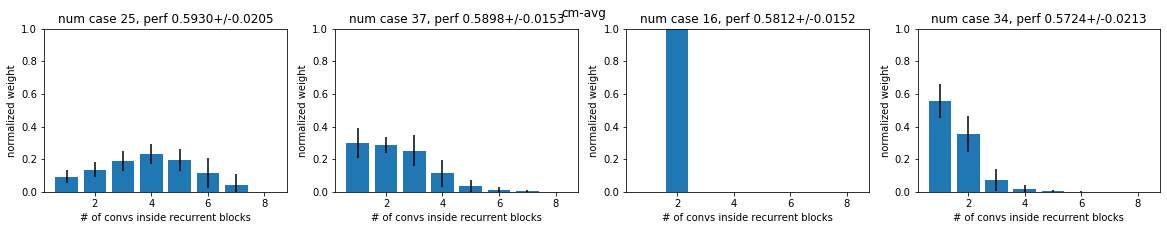

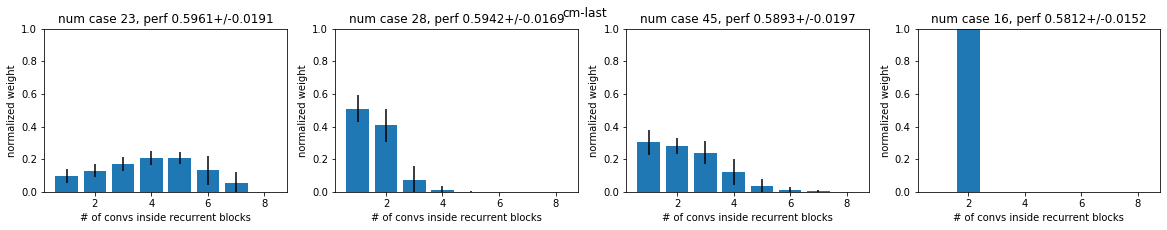

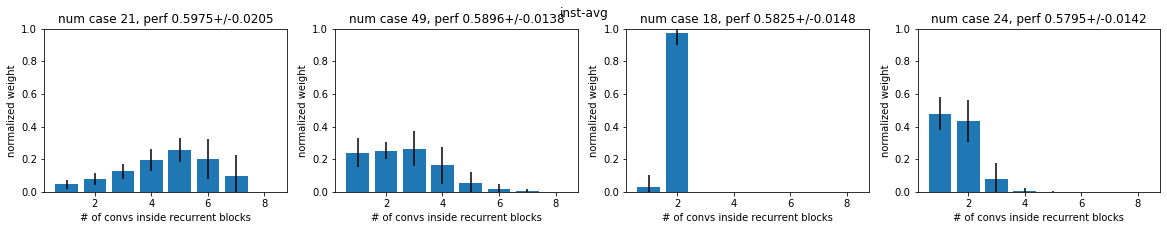

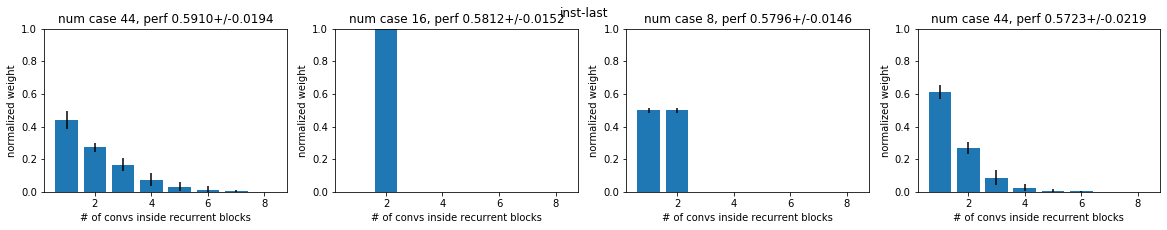

In [41]:
plot_cluster_wrapper(train_size=2560, readout_type=None,num_c=16,num_l=2)

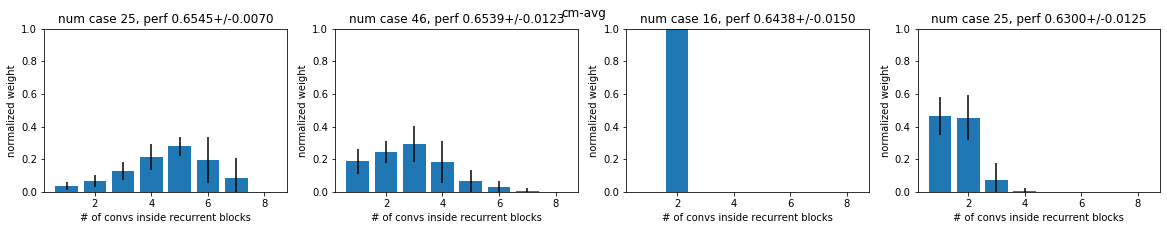

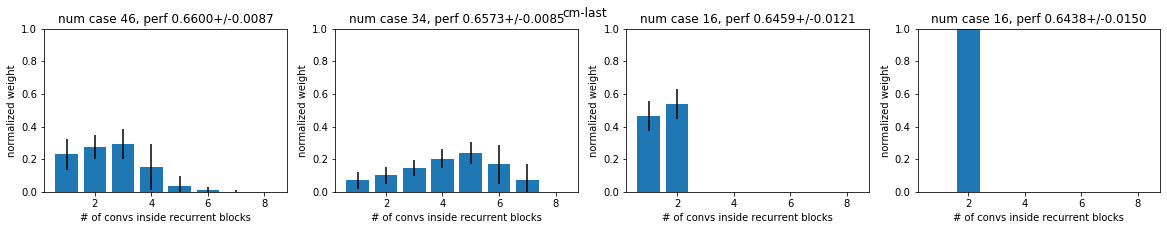

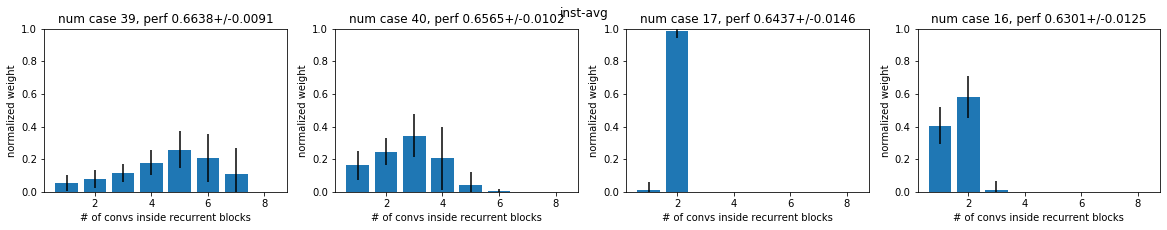

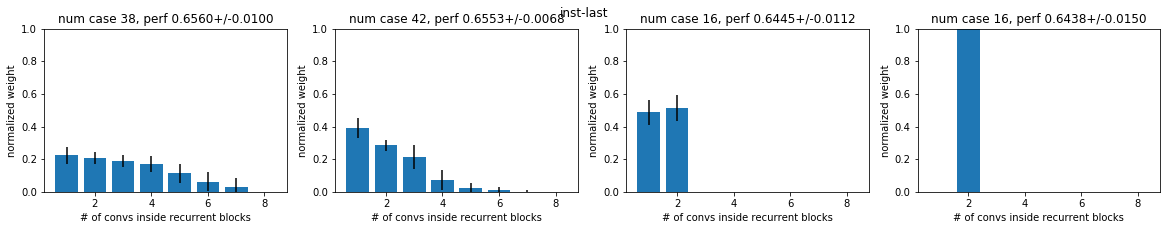

In [46]:
plot_cluster_wrapper(train_size=5120, readout_type=None,num_c=32,num_l=2)